<a href="https://colab.research.google.com/github/kleber293/Metodos_Colab/blob/main/Metodo_de_Euler_modificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MÉTODO DE EULER MODIFICADO

Se utilizando da formula abaixo, para a primeira curva e logo em seguida traçando outra reta seguindo a função da EDO e assim trabalhando com a média das duas
<center> $\overline{y}_{i+1}=y_i+h\:f(x_i,\:y_i)$ </center>

A ideia se dá por meio da fórmula abaixo, na qual é o metódo de Euler com uma correção do tipo
<center> $y_{i+1}=y_i+\dfrac{h}{2}\left[f(x_i,\:y_i)+f(x_{i+1},\:\overline{y}_{i+1})\right]$ </center>

---

## PROBLEMA PROPOSTO

Traçar uma curva aproximada á EDO abaixo, na qual um dos pontos se encontra em $(0, 1)$
<center> $f'(x,\:y) = x + y$ </center>

---


In [1]:
#@markdown ## Chamando as bibliotecas
import matplotlib.pyplot as mat
import numpy as n

In [2]:
#@markdown ### Definindo as funções que vamos utilizar
def g(x, y):
    FUNCTION = x+y #@param {type:"raw"}  
    return FUNCTION

def euler(x0, y0, h):
    t1 = g(x0, y0)
    y1 = y0 + h*t1
    return y1

def euler_modificado(x0, y0, h):
    t1 = g(x0, y0)
    t2 = g(x0+h, y0 + h*g(x0, y0))
    y1 = y0 + h/2*( t1 + t2 )
    return y1


In [3]:
#@markdown ### Definindo as váriaveis do problema
x0, y0, y1 = [0], [1], [1]

In [4]:
#@markdown ### Criando uma lista de pontos que a função assume ao percorrer
#@markdown ### a formula sobre a reta tangente a solução.
QUANTIDADE = 470 #@param {type:"slider", min:0, max:1000, step:10}
PASSO = 0.2 #@param {type:"slider", min:0.01, max:1, step:0.01}
 
for i in range(QUANTIDADE):
    x0.append(x0[i]+PASSO)
    y0.append(euler(x0[i], y0[i], PASSO))
    y1.append(euler_modificado(x0[i], y1[i], PASSO))
  

## CAIXAS DE EXPEÇÃO TIPO GRÁFICOS

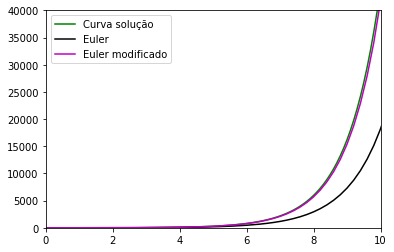

In [5]:
#@markdown ### A nivel de comparação

CURVA_SOLUCAO = True #@param {type:"boolean"}
MÉTODO_DE_EULER = True #@param {type:"boolean"}
MÉTODO_DE_EULER_MODIFICADO = True #@param {type:"boolean"}

mat.ylim(0, 40000)
mat.xlim(0, 10)

if CURVA_SOLUCAO:
    t = n.arange(0, 10, 0.1)
    mat.plot(t, -t-1+2*n.exp(t), color='g', label='Curva solução') # Curva solução (VERDE)

if MÉTODO_DE_EULER:
    mat.plot(x0, y0, color='k', label='Euler') # Curva aproximada, Euler (PRETO)

if MÉTODO_DE_EULER_MODIFICADO:
    mat.plot(x0, y1, color='m', label='Euler modificado') # Curva aproximada, euler_modificado (ROSA)

mat.legend()
mat.show()
